
#  Projet Speed Dating

#  Informations sur le Dataset :  
Les données ont été recueillies auprès des participants à des événements expérimentaux de speed dating de 2002 à 2004. Au cours des événements, les participants auraient un « premier rendez-vous » de quatre minutes avec tous les autres participants du sexe opposé. À la fin de leurs quatre minutes, on a demandé aux participants s’ils aimeraient revoir leur date. On leur a également demandé d’évaluer leur date sur six attributs : attractivité, sincérité, intelligence, plaisir, ambition et intérêts partagés. 

# Objectifs :  
1) Exploration de variables (données manquantes)
2) Analyse descriptives
3) Comment obtenir un second rendez-vous

**Importation des Bibliothèques**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_row',200)

**Chargement du Dataset**

In [3]:
data_complet=pd.read_csv("Speed_Dating_Data.csv", encoding= 'unicode_escape') #chargement du dataset

**Exploration du dataset**

In [4]:
print("La tête du DataSet complet")
data_complet.head() #affiche le dataset

La tête du DataSet complet


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Les dimensions du dataset sont de : {}".format(data_complet.shape)) #dimension du dataset

Les dimensions du dataset sont de : (8378, 195)


**195 variables !**  
Ce dataset contient 195 variables. On remarque d'un premier coup d'oeil que beaucoup de variables ont des données manquantes et devront par la suite être enlevé.  
Nous pouvons vérifier cela avec le graphique ci-dessous:

Text(0.5, 1.0, 'Représentation des données manquantes du dataset')

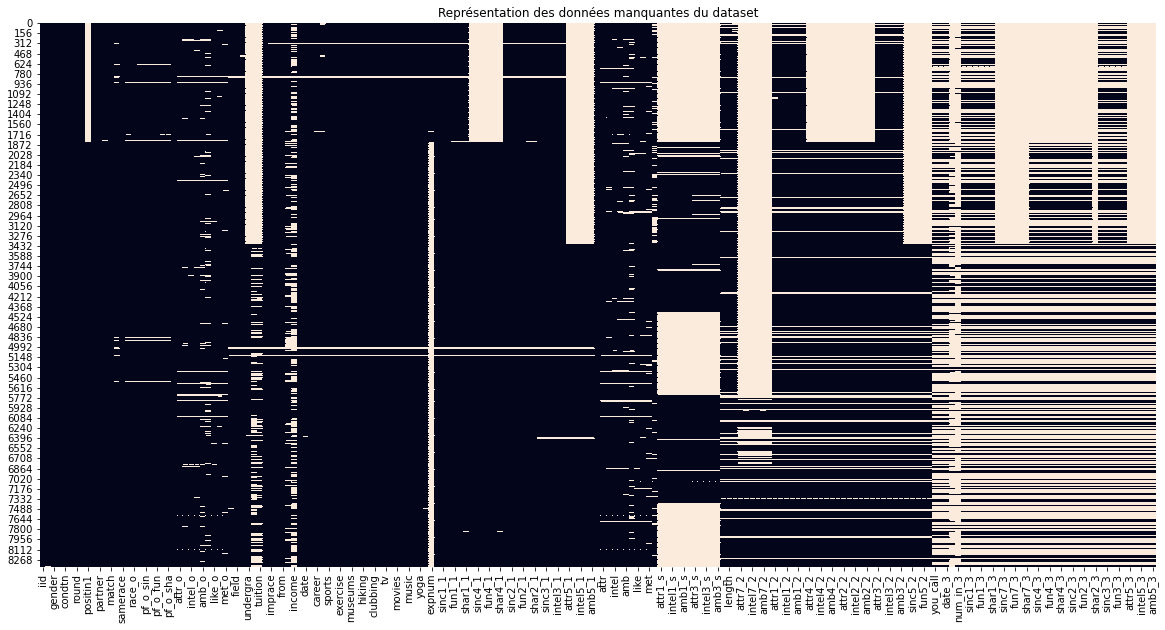

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data_complet.isna(), cbar=False)
plt.title('Représentation des données manquantes du dataset')

**Interprétation :**  
Le graphique 'Représentation des données manquantes du dataset' montre que beaucoup de variables sont inutilisables du fait d'un grand nombre de données manquantes (données manquantes repésentés en blanc sur la figure) !  
  
**On supprime des colonnes :**  
Un ensemble de variables sont inutilisables.
1) Regarder le pourcentage de données manquantes
2) Interpréter les résultats
3) Surpimer les variables 

In [7]:
(data_complet.isna().sum()/data_complet.shape[0]).sort_values(ascending=True)

iid         0.000000
dec_o       0.000000
samerace    0.000000
match       0.000000
partner     0.000000
order       0.000000
position    0.000000
dec         0.000000
wave        0.000000
condtn      0.000000
idg         0.000000
gender      0.000000
round       0.000000
id          0.000119
pid         0.001194
race        0.007520
field       0.007520
race_o      0.008713
hiking      0.009429
dining      0.009429
exercise    0.009429
goal        0.009429
sports      0.009429
go_out      0.009429
museums     0.009429
attr2_1     0.009429
tvsports    0.009429
art         0.009429
tv          0.009429
clubbing    0.009429
reading     0.009429
sinc2_1     0.009429
theater     0.009429
movies      0.009429
concerts    0.009429
music       0.009429
shopping    0.009429
yoga        0.009429
attr1_1     0.009429
sinc1_1     0.009429
gaming      0.009429
from        0.009429
imprace     0.009429
intel1_1    0.009429
intel2_1    0.009429
fun2_1      0.009429
imprelig    0.009429
field_cd    0

**resultat**  
Pour ce projet je vais dans un premier temps garder seulement les variables qui ont moins de 15% de valeurs manquantes 

In [8]:
data = data_complet[data_complet.columns[data_complet.isna().sum()/data_complet.shape[0] <0.15]]
data.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,4,1,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,3,2,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,10,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,5,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,7,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


Text(0.5, 1.0, 'Représentation des données manquantes du dataset après suppresion des colonnes ')

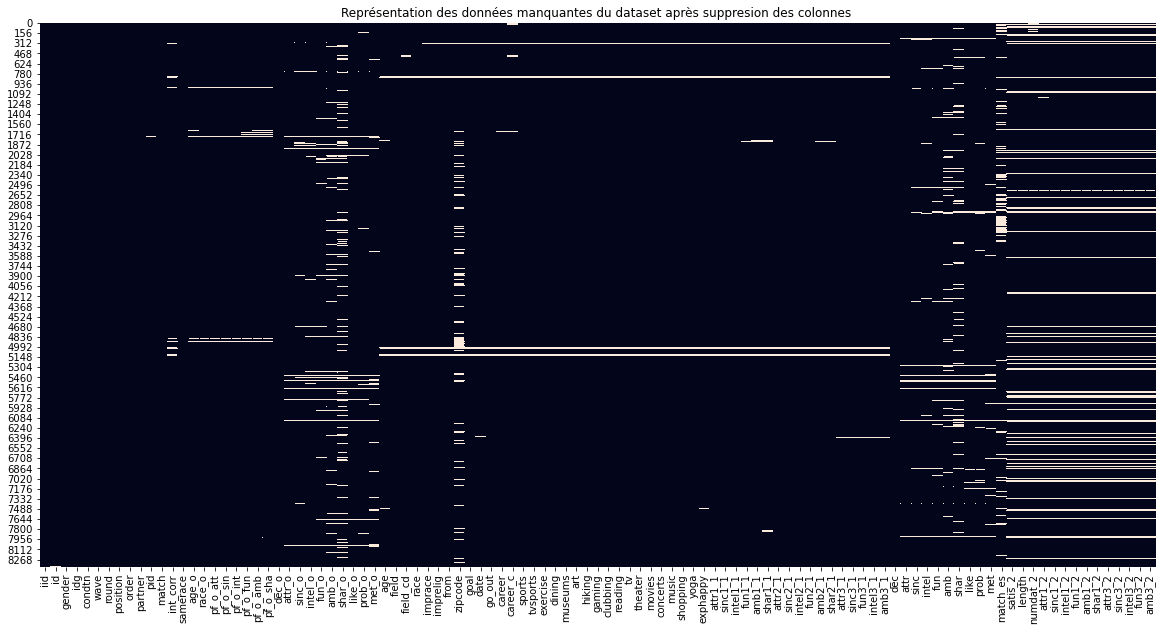

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.title('Représentation des données manquantes du dataset après suppresion des colonnes ')

**Attention**  
La colonne "iid" correspond à l'identifiant unique du participant. Hors chaque participants intenient plusieurs fois dans les speed dating  
--> Conséquence :  
Un participant est représenté plusieurs fois, les analyses de genre et d'origine(par exemple) seront biaisées par la répétition d'un même participant!  
**Conclusion**  
Pour certaines analyses je vais devoir enlever les "iid" dupliqués. 

**A suivre**
1) Une première analyse pour connaître la popultation qui participe au speed dating
2) Une seconde analyse pour essayer d'obtenir plus efficacement un second rendez-vous! 

**1) Je récupère les variables qui décrivent la personnalité de chaque participant**

In [10]:
caracteristique = ['gender', 'age', 'field',
       'race', 'imprace', 'imprelig', 'from', 'goal', 'date', 'go_out', 'career',
        'sports', 'tvsports', 'exercise', 'dining', 'museums','career',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum'] #je récupère les caractéristiques propre à chaque particitpant. 
data_caracteristique = data_complet[['iid','wave'] + caracteristique].drop_duplicates()
data_caracteristique.shape
#le drop_duplicates va permettre de supprimer les participants qui apparaissent plusieurs fois dans le dataset

(551, 33)

Plusieurs variables sont représentées par des nombre. Première étape est de changer la valeur de ses variables pour avoir une meilleure visibilité des résultats

In [11]:
data_caracteristique['gender'] = data_caracteristique['gender'].apply(lambda x : 'Femme' if x == 0 else 'Homme')
data_caracteristique['race'] = data_caracteristique['race'].apply(lambda x : 'Africaine' if x == 1
                                               else 'Européenne' if x == 2
                                               else 'Latino' if x == 3
                                               else 'Asiatique' if x == 4
                                               else 'Americain' if x == 5
                                               else 'Autre')
data_caracteristique['goal'] = data_caracteristique['goal'].apply(lambda x : 'Soirée amusante' if x == 1
                                               else 'Rencontrer de nouvelles personne' if x ==2
                                               else 'Obtenir un rdv' if x == 3
                                               else 'Pvoir une relation sérieuse' if x == 4
                                               else "Pour dire je l'ai fait" if x == 5
                                               else 'Autre')
data_caracteristique['go_out'] = data_caracteristique['go_out'].apply(lambda x : 'Plusieurs fois par semaine' if x == 1
                                                   else '2 fois par semaine' if x == 2
                                                   else '1 fois par semaine' if x == 3
                                                   else '2 fois par mois' if x == 4
                                                   else '1 fois par mois' if x == 5
                                                   else 'Quelque fois par an' if x == 6
                                                   else 'Jamais')
# L'objectif ici est de changer la valeur des variables catégorielles pour avoir un dataset lisible

In [12]:
print('Changement des variables catégorielles 1,2,3... Par leurs valeurs \nVoici la tête du Dataset avec les changements')
data_caracteristique.head()

Changement des variables catégorielles 1,2,3... Par leurs valeurs 
Voici la tête du Dataset avec les changements


,iid,wave,gender,age,field,race,imprace,imprelig,from,goal,...,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum
0,1,1,Femme,21.0,Law,Asiatique,2.0,4.0,Chicago,Rencontrer de nouvelles personne,...,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0
10,2,1,Femme,24.0,law,Européenne,2.0,5.0,Alabama,Soirée amusante,...,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0
20,3,1,Femme,25.0,Economics,Européenne,8.0,4.0,Connecticut,Autre,...,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0
30,4,1,Femme,23.0,Law,Européenne,1.0,1.0,Texas,Soirée amusante,...,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0
40,5,1,Femme,21.0,Law,Européenne,8.0,1.0,Bowdoin College,Rencontrer de nouvelles personne,...,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0


In [13]:
data_caracteristique['race'].unique()  # test des valeurs sur la variable race

array(['Asiatique', 'Européenne', 'Autre', 'Latino', 'Africaine'],
      dtype=object)

In [14]:
# séparation en deux datasets homme et femme 
femme = data.loc[data.gender == 0, :]
homme = data.loc[data.gender == 1, :]

**Explications**  
J'ai séparé le dataset en deux dataset distinct : Femme et Homme.  
Ces deux dataset me serviront plus tard dans mon analyse

# Statistiques Descriptives du Dataset

Dans cette partie du code, j'ai réalisé quelques graphiques permettant d'avoir une idée sur la popultaion qui participe au speed dating

### Âge, origines, ambitions

In [15]:
print("La moyenne d'âge (année) par genre est de :")
print(data_caracteristique.groupby('gender')['age'].mean().round(1))

# Utilisation de groupby et mean pour connaitre l'âge moyen des participants

La moyenne d'âge (année) par genre est de :
gender
Femme    26.1
Homme    26.6
Name: age, dtype: float64


Text(0.5, 1.0, "Boxplot : Distidution de l'âge en fonction du genre")

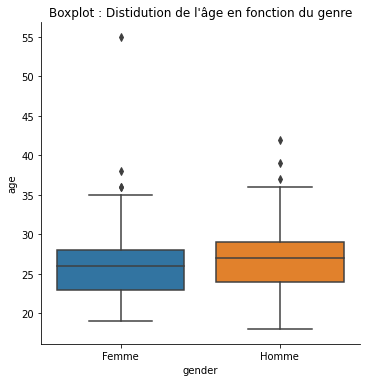

In [16]:
sns.catplot(x = 'gender', y = 'age', data = data_caracteristique, kind = 'box')
plt.title("Boxplot : Distidution de l'âge en fonction du genre")

**Première analyse**  
Pour les femmes et les hommes, la moyennes d'âge est de 26 ans. 
Le Boxplot montre qu'il y a des outliers. Pour ce projet, les outliers ne sont pas un problème car on reste dans l'analyse descriptive  

C:\Users\marti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Les origines les plus représentées dans ce Dataset sont : Européen et Asiatique


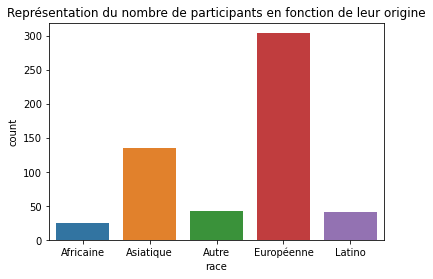

In [17]:
sns.countplot(data_caracteristique['race'].sort_values() )
plt.title("Représentation du nombre de participants en fonction de leur origine")
print("Les origines les plus représentées dans ce Dataset sont : Européen et Asiatique")


([<matplotlib.patches.Wedge at 0x1d681428a30>,
 [Text(1.0879354682541844, 0.16246974153530405, 'Africaine'),
  Text(0.5262979460096839, 0.9659246720246811, 'Asiatique'),
  Text(-0.5481884804734649, 0.9536715314384685, 'Autre'),
  Text(-0.6581780179425973, -0.8813635440027879, 'Européenne'),
  Text(1.0686107038707322, -0.2609045104495096, 'Latino')],
 [Text(0.5934193463204642, 0.08861985901925674, '4.7%'),
  Text(0.28707160691437306, 0.5268680029225533, '24.7%'),
  Text(-0.29901189844007176, 0.5201844716937101, '7.8%'),
  Text(-0.3590061916050531, -0.4807437512742479, '55.2%'),
  Text(0.582878565747672, -0.14231155115427793, '7.6%')])

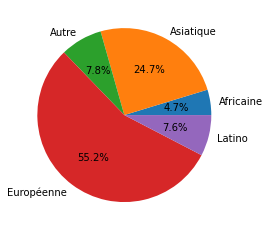

In [18]:
labels = 'Africaine', 'Asiatique', 'Autre','Européenne', 'Latino'
sum_africain = 0
sum_asiatique = 0
sum_autre = 0
sum_europeen = 0
sum_latino = 0
size = []
for i in data_caracteristique['race']:
    if i == 'Africaine':
        sum_africain += 1
    elif i == 'Asiatique' :
        sum_asiatique += 1
    elif i == 'Autre':
        sum_autre += 1
    elif i == 'Européenne':
        sum_europeen += 1
    else :
        sum_latino += 1
plt.pie([sum_africain,sum_asiatique,sum_autre,sum_europeen,sum_latino], labels=labels, autopct='%1.1f%%')

**Sceonde Analyse**  
On a une population majoritairement Européenne 

Les participants font des Speed Dating pour rencontrer principalement de nouvelles personnes sans prise de tête 
Il y a peu de différence entre les homme et les femmes


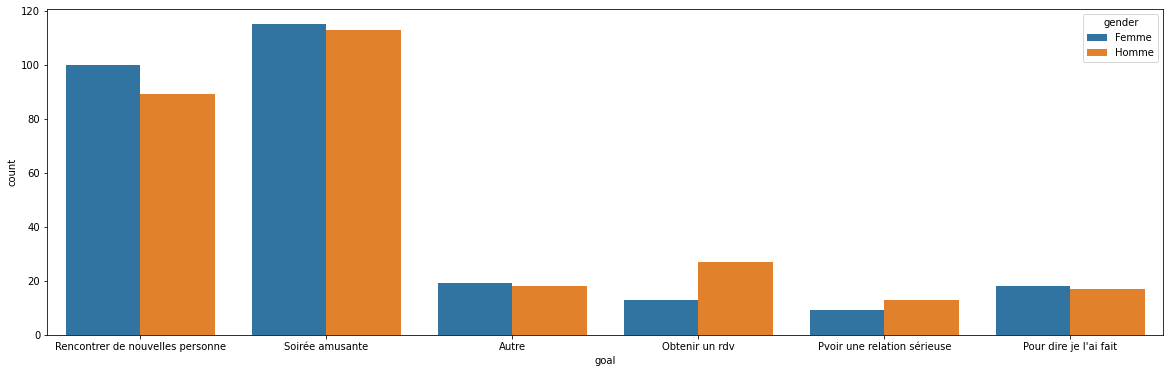

In [19]:
plt.figure(figsize = (20, 6))
ax = sns.countplot(x="goal", hue = 'gender', data=data_caracteristique)
print("Les participants font des Speed Dating pour rencontrer principalement de nouvelles personnes sans prise de tête \nIl y a peu de différence entre les homme et les femmes") 

**Troisième anayse**  
Ici encore peu de différence entre les femmes et les hommes. L'objectif glogbal de ce speed dating est de passer du bon temps sans se prendre la tête.

# Facteurs d'obtenir un deuxième rendez-vous

Dans cette partie, je reprends le dataset avec tout les "iid". En effet, cette fois ci, je ne regarde pas les caractéristiques de chaque participant unique mais les resultats de chaques speed dating

**variables importantes**  
Dans le dataset je vais retenir deux variables importantes qui vont me permettre de grouper mes résultats.
*variable :*  
dec_0 :  prend 2 valeurs
>1 la personne souhaite un second rdv
>0 la personne ne souhaite pas de second rdv

dec : Cette variable est la même que dec_0 mais pour la second personne du speed dating

In [20]:
no_love_count = len(data_complet[(data_complet['dec_o']==0) & (data_complet['dec']==1)]) 
+ len(data_complet[(data_complet['dec_o']==1) & (data_complet['dec']==0)]) # on fait le compte des dates où un des participant à mis 0 et l'autre 1
coeur_brise = no_love_count / len(data_complet.index) # on divise le nombre de date sans réussite par le nombre total de date


print("Il y a {:.2f}% de participants qui ont le coeur brisé. Ils voulaient un deuxième rendez-vous mais ce n'est pas reciproque".format(coeur_brise*100))

Il y a 25.52% de participants qui ont le coeur brisé. Ils voulaient un deuxième rendez-vous mais ce n'est pas reciproque


In [21]:
print("Statistique amusante !!! Avec le numéros 4 et 9 vous augmentez la probilité de faire un match !! ")
data_complet.groupby('id')['match'].sum().sort_values(ascending = False)

Statistique amusante !!! Avec le numéros 4 et 9 vous augmentez la probilité de faire un match !! 


id
4.0     102
9.0     102
6.0      98
8.0      97
2.0      96
5.0      84
7.0      84
1.0      83
10.0     70
16.0     66
3.0      66
11.0     64
12.0     58
14.0     56
15.0     54
13.0     50
17.0     45
18.0     37
19.0     32
20.0     22
22.0      8
21.0      6
Name: match, dtype: int64

In [22]:
pcm = (sum(data_complet.match)/len(data_complet.match))*100
print ("pourcentage de match : {:.2f}% ".format(pcm))

pourcentage de match : 16.47% 


In [23]:
df1 = data_complet.iloc[:, 11:35]
df2 = data_complet.iloc[:, 39:43]
df3 = data_complet.iloc[:, 45:67]
df4 = data_complet.iloc[:, 97:107]

df = pd.concat([data_complet.iloc[:, 0],data_complet.iloc[:, 2],df1,df2,df3,df4], axis=1)
# on selctionne que certaines variables, celles ou il y à le moins de valeurs manquantes

In [24]:
df = df.dropna()
print(df.shape) # il reste que 62 variables

(5433, 62)


On remarque que pour la population femme, la décision ne ne pas poursuivre avec le participant est plus fréquente


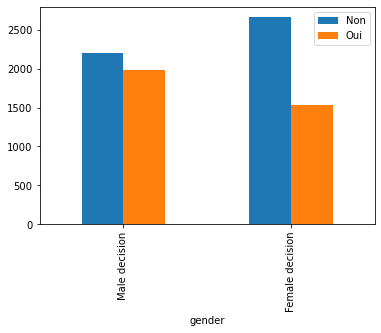

In [25]:
decision = pd.crosstab(data_complet.gender,data_complet.dec_o).plot(kind='bar')
plt.title =("Décision en fonction du genre")
plt.legend(["Non", "Oui"])
decision.set_xticklabels(['Male decision','Female decision'])

print("On remarque que pour la population femme, la décision ne ne pas poursuivre avec le participant est plus fréquente")

# Matrice de corrélation

**Objectif**  
La matrice de corrélation à pour objectif de regarder si il existe une corrélation entre les variables (ici corrélation linéaire).  
Cette corrélation peut être positive ou négative.  
Plus l'indice de corrélation entre deux variables est proche de 1 ou de -1, plus la corrélation sera importante.  

**Résultat**
Pour la première matrice de corrélation, je vais m'intéressé à un résultat :  
Comparer la corrélation entre la variable **dec_0** (rappel : cette variable prend la valeur de 0 ou 1, selon l'intention ou non de poursuivre avec un second rendez-vous.  
  
On peut remarque facilement que la variable dec_0 a une corrélation positive avec les variables décrivant la personnalité de la personne en face.  
Pour mieux représenter ce résultat, je vais zoomer sur cette corrélation, en séparant les hommes et les femmes !

La matrice de corrélation est difficile à lire, mais on peut remarquer qu'il y a un cluster de corrélation entre la décision et les attibus


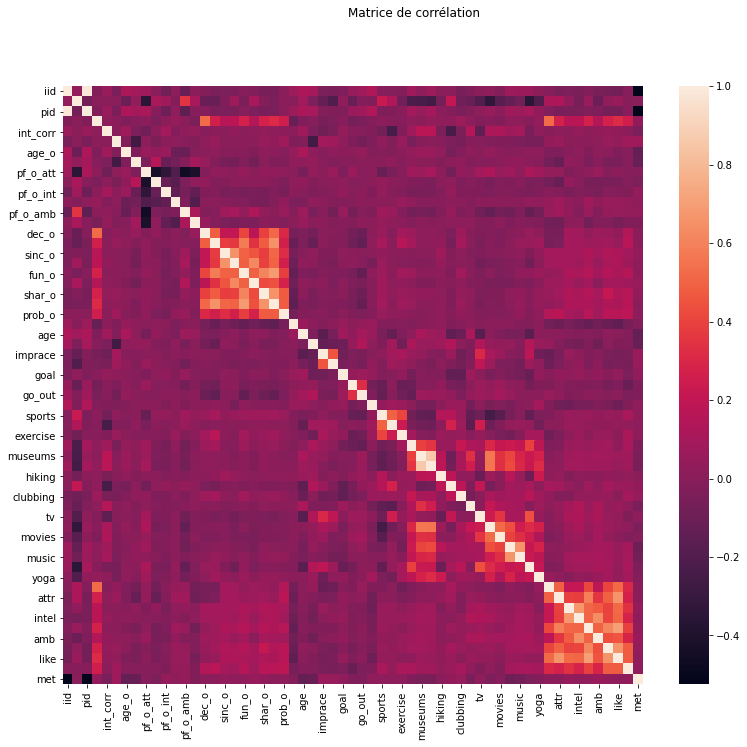

In [26]:
corr = df.corr()

plt.figure(figsize=(13,11))
sns.heatmap(corr)
plt.suptitle("Matrice de corrélation")


print("La matrice de corrélation est difficile à lire, mais on peut remarquer qu'il y a un cluster de corrélation entre la décision et les attibus")

Text(0.5, 0.98, 'Matrice de corrélation entre les attribus et la décision chez les hommes')

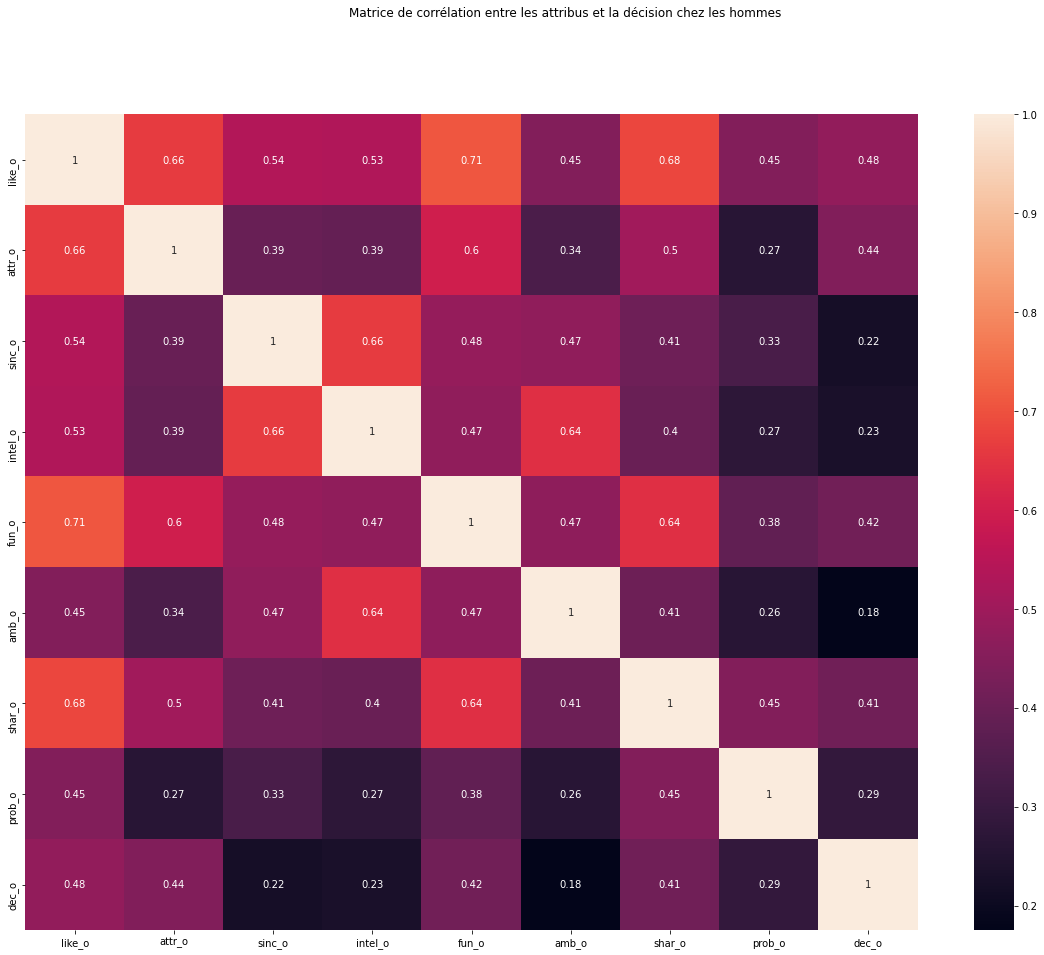

In [27]:
attribus = ["like_o", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "prob_o", "dec_o"]

data_attribus_homme = homme[attribus]
data_attribus_femme = femme[attribus]

corr_at_h = data_attribus_homme.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_at_h,annot=True)
plt.suptitle('Matrice de corrélation entre les attribus et la décision chez les hommes')

**Résultat homme**  
Sur cette matrice de corrélation, il faut regarder la corrélation entre la variable dec_0(en bas à gauche) avec les variables sur la ligne du bas.
On remarque que la décision(chez les hommes) corrèle avec le fait que la femme soit fun(42%) et attirante(44%). La sincérité a moins d'importance sur un premier rendez-vous(22%).

Text(0.5, 0.98, 'Matrice de corrélation entre les attribus et la décision chez les femmes')

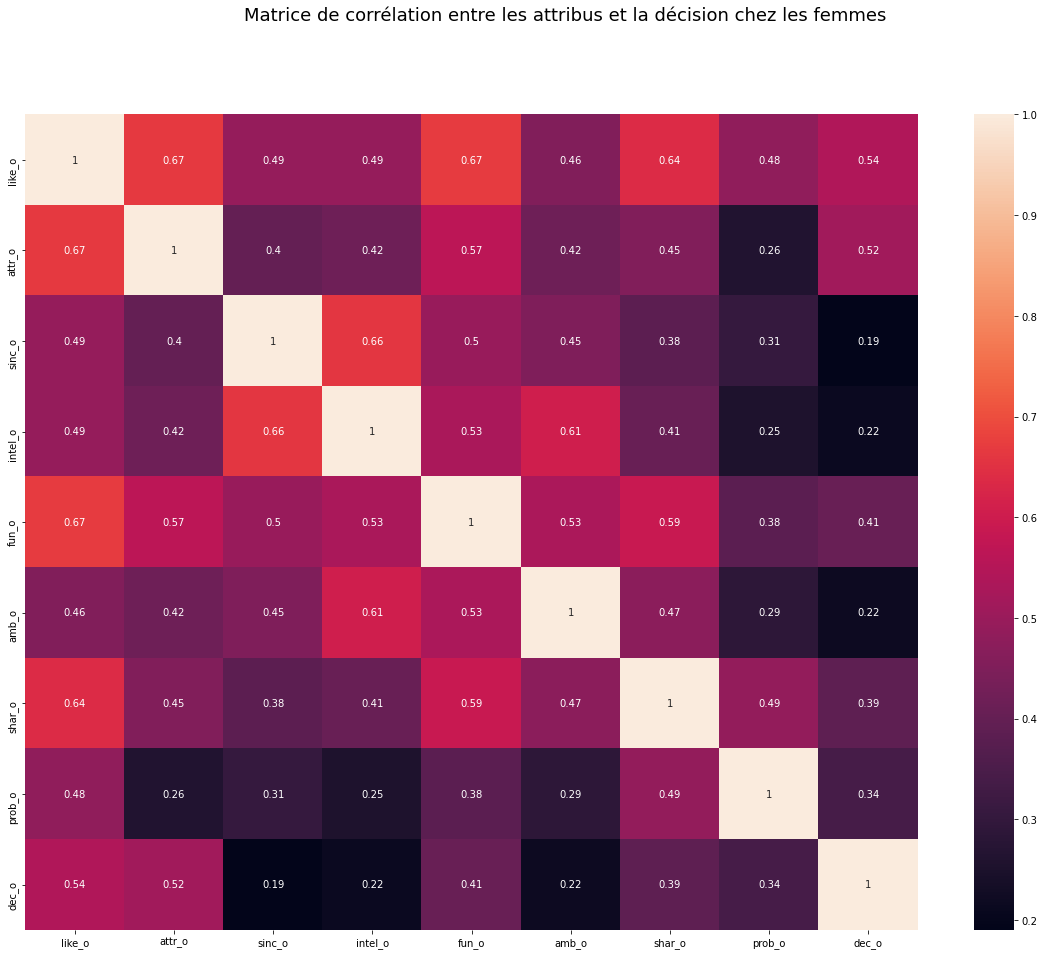

In [28]:
corr_at_f = data_attribus_femme.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_at_f,annot=True)
plt.suptitle('Matrice de corrélation entre les attribus et la décision chez les femmes', fontsize=18)

**Résultat femme**  
Sur cette matrice de corrélation, il faut regarder la corrélation entre la variable dec_0(en bas à gauche) avec les variables sur la ligne du bas.
On remarque que la décision(chez les femmes) corrèle avec le fait que l'homme soit attirant(52%) et fun(42%). La sincérité a moins d'importance sur un premier rendez-vous(19%).

Avec ces deux matrices de corrélation on remarque que pour les femmes et les hommes, le choix se fait surtout sur le fun et les passions partagées !

#   Conclusion

## I) Prise en main du dataset  
Le dataset Speed-dating contient **195 varaibles**, plusieurs de ces variables contiennent **plus de 15% de valeurs manquantes**. Pour L'analyse descriptives plusieurs de ses variables ont été enlevé. Cependant, si l'objectif de e projet était de réaliser un algorithme de machine learning, davantage de travail sur les données serait important de faire.  
  
## II) statistiques descriptives du Dataset.  
Pour mieux comprendre la population du speed-dating, une analyse descriptive a été réalisé. On remarque que la popultaion est jeune et son objectif est de passer une bonne soirée sans se prendre la tête...  
  
## III) facteurs favorisant d'obtenir un match !!  
Plusieurs paramètres vont rentrer en compte, définir l'amour n'est pas simple à faire! Cependant voici un petit coup de pouce :  
Essaye de portere le numéro 4 ou 9 lors du speed-dating, cela augmentera ta probalité d'obtenir un match. 
De plus, reste toi même et sois **fun**  

## Bon courage !! 